In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow
tensorflow.__version__

'2.18.0'

In [ ]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



Label{} 5


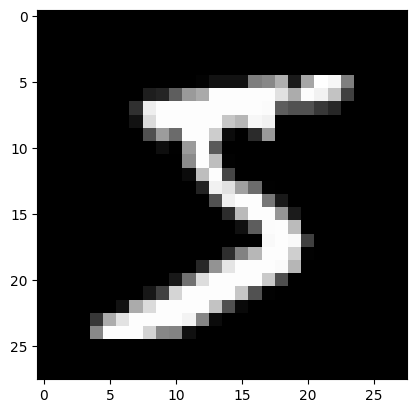

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Label{}", format(y_train[000]))
plt.imshow(x_train[000], cmap='gray')

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Reshape and test and test Sets into compatable shapes

In [ ]:
 x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
 x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
print("x_train shape: ", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])

print("Max value in x_train: ", x_train.max())
print("Min value in x_train: ", x_train.min())

x_train shape:  (60000, 28, 28, 1)
Images in x_train: 60000
Images in x_test: 10000
Max value in x_train:  1.0
Min value in x_train:  0.0


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train: ", y_train.shape)
print("One value of y_train: ", y_train[0])

Shape of y_train:  (60000, 10)
One value of y_train:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='adam')

model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8778 - loss: 0.4243 - val_accuracy: 0.9560 - val_loss: 0.1450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9634 - loss: 0.1229 - val_accuracy: 0.9676 - val_loss: 0.1038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0777 - val_accuracy: 0.9735 - val_loss: 0.0848
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9832 - loss: 0.0571 - val_accuracy: 0.9739 - val_loss: 0.0861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9871 - loss: 0.0427 - val_accuracy: 0.9751 - val_loss: 0.0887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9771 - val_loss: 0.0757
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9760 - val_loss: 0.0872
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9927 - loss: 0.0238

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.1097


[0.08567836135625839, 0.9760000109672546]